# **AI Workshop: From Agents to Intelligent Search**

## - Led by Ayaan Ahmad

### A hands-on guide on building and programming intelligent agents to solve complex problems.

# AI Workshop - Lab 5: The Comparison

This is the final lab where we bring everything together. 
We will load the `performance_results.csv` file created by the previous labs 
and create powerful visualizations to compare the efficiency and effectiveness of DFS, BFS, and A*.

## Install Libraries

In [ ]:
pip install Pillow

### Importing Libraries

In [1]:
from pyamaze import maze, agent, COLOR
import os
import glob
from PIL import Image
from queue import PriorityQueue
import time # To measure execution time
import pandas as pd # To handle CSV data
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For better visualizations


# Create a list to store performance results
performance_results = []

# Part 4: Conclusion & Comparision

Today, we've seen how different algorithms can solve the same problem with vastly different strategies and efficiencies.

DFS is simple but often finds suboptimal paths.

BFS finds the shortest path but can waste time exploring in every direction.

A* provides the best of both worlds: it finds the optimal path efficiently by using an intelligent heuristic.

This progression from blind searching to intelligent, heuristic-driven searching is fundamental to modern AI. In the real world, the "maze" is a complex business problem, and the "heuristic" is domain-specific knowledge.

--- Algorithm Performance Data ---


,Algorithm,Time (s),Explored Cells,Path Length
0,BFS,0.012537,554,72
1,A*,0.005546,318,72
2,DFS,0.019512,592,150


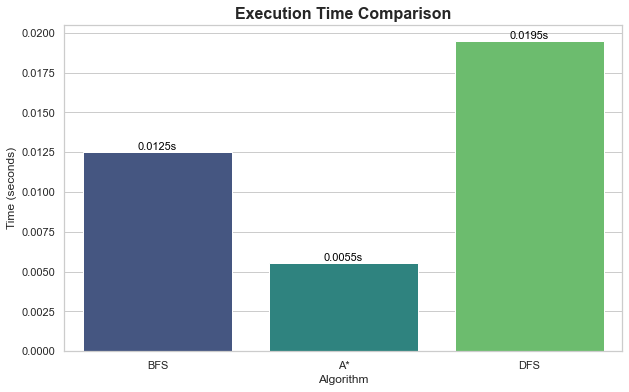

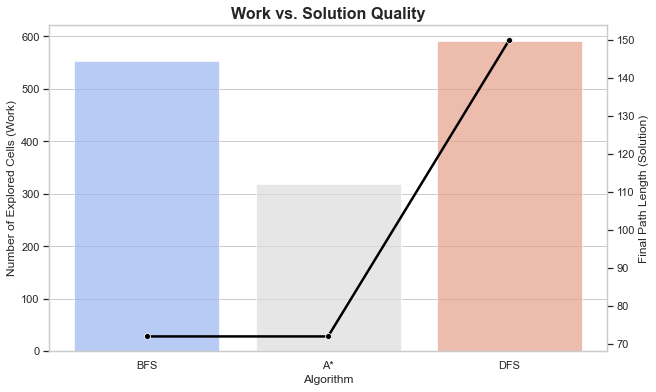

In [2]:

# 2. Load and Display Data
results_file = 'performance_results.csv'
try:
    df = pd.read_csv(results_file)
    print("--- Algorithm Performance Data ---")
    display(df)
except FileNotFoundError:
    print(f"Error: '{results_file}' not found. Please run Labs 2, 3, and 4 first to generate the data.")

# 3. Create Visualizations
if 'df' in locals():
    # Set plot style
    sns.set_theme(style="whitegrid")

    # --- Graph 1: Execution Time ---
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Algorithm', y='Time (s)', data=df, palette='viridis')
    ax.set_title('Execution Time Comparison', fontsize=16, fontweight='bold')
    ax.set_xlabel('Algorithm', fontsize=12)
    ax.set_ylabel('Time (seconds)', fontsize=12)
    # Add value labels on top of bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.4f}s', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.show()

    # --- Graph 2: Work vs. Solution Quality ---
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Bar plot for Explored Cells (Work)
    sns.barplot(x='Algorithm', y='Explored Cells', data=df, ax=ax1, palette='coolwarm', alpha=0.7)
    ax1.set_title('Work vs. Solution Quality', fontsize=16, fontweight='bold')
    ax1.set_ylabel('Number of Explored Cells (Work)', fontsize=12)
    ax1.set_xlabel('Algorithm', fontsize=12)

    # Line plot for Path Length (Solution Quality) on a secondary axis
    ax2 = ax1.twinx()
    sns.lineplot(x='Algorithm', y='Path Length', data=df, ax=ax2, color='black', marker='o', sort=False, linewidth=2.5)
    ax2.set_ylabel('Final Path Length (Solution)', fontsize=12)
    ax2.grid(False)

    plt.show()